<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_ml/ml07_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent(경사 하강법)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

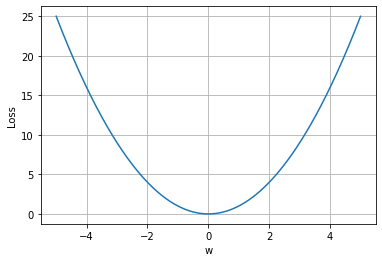

In [2]:
w = np.arange(-5, 5, 0.001)
loss = w ** 2  # 손실 함수: J(w) = w^2

plt.plot(w, loss)
plt.grid()
plt.xlabel('w')
plt.ylabel('Loss')
plt.show()

In [3]:
# 임의의 w를 선택
w_init = -4

In [4]:
# 선택한 w에서 비용함수의 접선의 기울기 계산
grad = 2 * w_init

In [5]:
# 최초의 w 위치에서 기울기의 반대 방향으로 약간 이동
w_next = w_init - grad * 0.1
w_next

-3.2

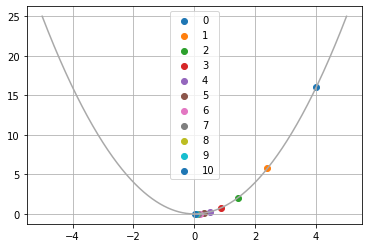

In [6]:
# 비용 함수(loss function)을 시각화
w = np.arange(-5, 5, 0.001)
loss = w ** 2
plt.plot(w, loss, color='darkgray')

# loss의 최솟값까지 이동하기 위해서 임의의 w에서 시작
w_init = 4
loss_init = w_init ** 2  # 임의의 시작값에서의 손실
plt.scatter(w_init, loss_init, label='0')

# 학습률: gradient가 감소하는 방향으로 얼마나 빠르게 이동할 지를 결정하는 (하이퍼)파라미터.
learning_rate = 0.2  # 학습률(0.1, 0.2, 0.3, 0.5, 0.8, 1.0, 1.1, ...) 테스트
for epoch in range(1, 11):  # 10번 반복 이동
    # 현재 위치에서 gradient를 계산
    grad = 2 * w_init
    # gradient가 감소하는 방향으로 약간 이동
    w_new = w_init - learning_rate * grad
    # 이동한 위치에서의 손실 계산
    loss_new = w_new ** 2
    # 이동한 위치를 시각화
    plt.scatter(w_new, loss_new, label=f'{epoch}')
    # 다음 이동을 위해서 현재 위치를 바뀐 새 위치로 변경
    w_init = w_new

plt.legend()
plt.grid()
plt.show()

**학습률(learning rate) hyperparameter**

* 학습률이 작은 경우에는 최솟값을 향해서 천천히 움직임.
* 학습률이 큰 경우에는 최솟값을 향해서 빠르게 움직이거나 또는 불안정하게 움직일 수 있음.
* 학습률이 너무 작으면 최대 반복 횟수(max_iter) 안에서 최솟값으로 수렴(convergence)하지 못할 수 있음.
    * 수렴할 때까지 최대 반복 횟수를 늘려줌.
    * 학습률을 키워줌.
* 학습률이 너무 크면 수렴하지 못하고 발산(divergence)하는 경우가 발생하기도 함.
    * 학습률을 줄여야 함.
* ML 알고리즘 중에서는 처음에는 학습률을 크게 하고, 에포크(epoch, 반복)가 진행될 때마다 학습률을 점점 작게 줄여 나가는 알고리즘도 있음.

# SGD(Stochastic Gradient Descent, 확률적 경사 하강법)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Fish Datasets

In [8]:
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [9]:
fish = pd.read_csv(fish_csv)

In [10]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [11]:
# Perch 어종만 선택
perch = fish[fish.Species == 'Perch']
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [12]:
# 특성 - Length
X = perch[['Length']].values
# 타겟 - Weight
y = perch['Weight'].values

X.shape, y.shape

((56, 1), (56,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44, 1), (12, 1), (44,), (12,))

In [45]:
# ML 모델 생성
sgd_reg = SGDRegressor(max_iter=1_000_000_000, eta0=0.9, learning_rate='adaptive')
# max_iter: 최대 반복 횟수
# eta0: 학습률 초깃값
# learning_rate: 학습률을 변화시키는 방법

In [46]:
# 모델 훈련
sgd_reg.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.9, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000000000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [47]:
# y = w0 + w1 * x
# intercept
print(sgd_reg.intercept_)
# coefficient
print(sgd_reg.coef_)

[-925.02030229]
[45.85571708]


In [48]:
# 훈련 셋 예측값
train_pred = sgd_reg.predict(X_train)
train_pred

array([ 358.93977589,  326.84077394,  -26.24824756,   83.80547342,
        -67.51839293, -127.13082514,  725.78551252,  221.37262466,
        909.20838083,  863.35266375, 1046.77553206,   83.80547342,
         -7.90596073,   83.80547342,  175.51690758,  336.01191735,
       1046.77553206,  909.20838083,  175.51690758,   37.94975635,
        336.01191735,  909.20838083,  579.04721787,  290.15620028,
        748.71337106, -296.79697832,  115.90447538, -237.18454612,
        771.6412296 ,  679.92979544,  391.03877785,  152.58904904,
        863.35266375,   37.94975635,  129.6611905 ,   83.80547342,
       1092.63124914,  106.73333196,  -53.76167781,  771.6412296 ,
         83.80547342,  248.88605491, 1000.91981499,  657.0019369 ])

In [49]:
y_train[:5]

array([250., 300.,  85., 135.,  78.])

In [50]:
mean_squared_error(y_train, train_pred)

11212.787162699758

오차(손실)이 너무 크다!!

MSE를 줄이기 위한 해결 방법
* max_iter 값 늘리기
* eta0 값 키우기
* learning_rate 변경
* ...

Fish(Perch) 데이터 셋 경우에는 샘플 개수가 너무 적어서 경사 하강법이 좋은 결과를 주지 못함.
* SGD 이외의 다른 모델을 고려


# Boston 주택 가격 데이터 셋

In [51]:
from sklearn import datasets

In [52]:
boston = datasets.load_boston()

In [53]:
# 데이터 셋 설명
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [54]:
# 특성 행렬, 타겟 벡터
X, y = boston['data'], boston['target']

In [56]:
X.shape, y.shape

((506, 13), (506,))

In [57]:
X[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [72]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [81]:
# ML 모델 생성
scaler = StandardScaler()
reg = SGDRegressor()
model = Pipeline(steps=[('scaler', scaler),
                        ('reg', reg)])

In [82]:
# 모델 훈련
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [83]:
model['reg'].intercept_

array([22.79700991])

In [84]:
model['reg'].coef_

array([-0.94569032,  0.54020038,  0.06332136,  0.76530185, -1.91363497,
        3.22929316, -0.17452792, -2.92783191,  1.56443356, -1.02769644,
       -2.01884074,  1.1288706 , -3.59883156])

In [85]:
train_pred  = model.predict(X_train)
train_pred[:5]

array([10.72995043, 19.53433728, 23.28663778, 11.94484753, 18.43911406])

In [86]:
# MSE
mean_squared_error(y_train, train_pred)

21.717861487004317

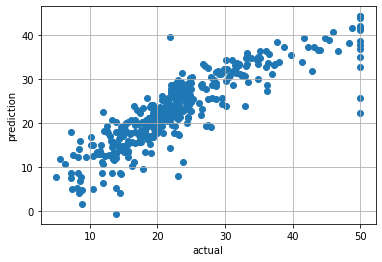

In [87]:
# 예측값 ~ 실젯값 scatter plot
plt.scatter(y_train, train_pred)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.grid()
plt.show()